# Problem 1 Solution

Use this notebook to write your code for problem 1.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
%matplotlib inline

In [2]:
def make_plot(X, y, clf, title, filename):
    '''
    Plots the decision boundary of the classifier <clf> (assumed to have been fitted
    to X via clf.fit()) against the matrix of examples X with corresponding labels y.

    Uses <title> as the title of the plot, saving the plot to <filename>.

    Note that X is expected to be a 2D numpy array of shape (num_samples, num_dims).
    '''
    # Create a mesh of points at which to evaluate our classifier
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # binarize 
    Z = np.where(Z > 0, np.ones(len(Z)), -1 * np.ones(len(Z)))
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8, vmin=-1, vmax=1)

    # Also plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    plt.savefig(filename)
    plt.show()

## Generating dataset (ignore solution)

In [3]:
def ellipse_sample(a, b, h, k, deg, N):
    values = []
    for i in range(N):        
        x = 10 * np.random.random()
        y = 10 * np.random.random()    
        th = ((x - h) * np.cos(deg) + (y - k) * np.sin(deg))**2 / a + \
             ((x - h) * np.sin(deg) - (y - k) * np.cos(deg))**2 / b  
        if th <= 1:
            values.append((x,y))
    return values

In [4]:
d1 = np.pi / 2 + 1.5 * np.pi / 9
values1 = np.array(ellipse_sample(1, 6, 4, 5, d1, 3000))

In [5]:
d2 = 2 * np.pi / 9
values2 = np.array(ellipse_sample(0.5, 2.5, 7, 7, d2, 6000))

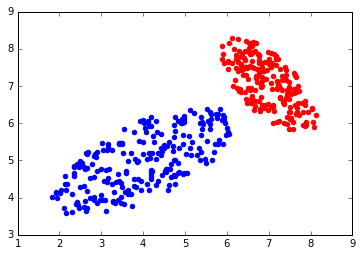

In [6]:
plt.scatter(values1[:,0], values1[:,1], color = 'b')
plt.scatter(values2[:,0], values2[:,1], color = 'r')

In [7]:
values1.shape

(233, 2)

In [8]:
values2.shape

(198, 2)

In [9]:
X = np.concatenate([values1, values2], axis=0)

In [10]:
y = np.concatenate([np.ones(values1.shape[0]), -1 * np.ones(values2.shape[0])])

In [11]:
data = np.concatenate([X, y.reshape(-1, 1)], axis=1)

In [12]:
np.savetxt('problem1data1.txt', data, delimiter='\t')

## Actual problem begins here

In [13]:
data = np.loadtxt('../data/problem1data1.txt')
X = data[:, :2]
y = data[:, 2]

In [14]:
logreg = LogisticRegression(C=1e5)
ridge = Ridge(alpha=1e-5)
logreg.fit(X,y)
ridge.fit(X,y)

Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

C:\Users\Ellen\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\Ellen\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


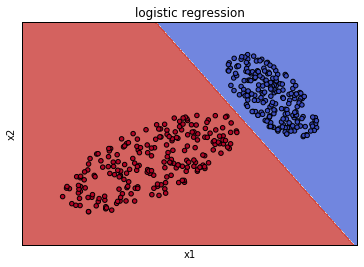

In [15]:
make_plot(X,y, logreg, 'logistic regression', 'logreg')

C:\Users\Ellen\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\Ellen\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


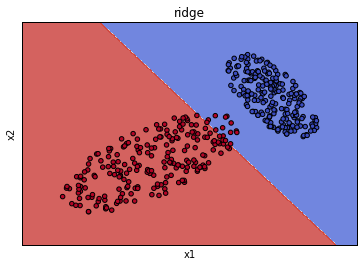

In [16]:
make_plot(X,y, ridge, 'ridge', 'ridge')